In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data = pd.read_csv("../../data/telecom_churn.csv")  

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.drop(["State", "Voice mail plan"], axis=1, inplace=True)

In [5]:
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [7]:
y = data["Churn"].astype("int")

In [8]:
X = data.drop("Churn", axis=1)

In [9]:
X.shape, y.shape

((3333, 17), (3333,))

In [10]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [12]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [99]:
first_tree = DecisionTreeClassifier(random_state=17)

In [74]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [75]:
cross_val_score(first_tree, X_train, y_train, cv=5).mean()

0.9138423504976518

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
first_knn = KNeighborsClassifier()

In [18]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

## настраиваем max_depth для дерева

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}

In [82]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [83]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 16.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [84]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

In [43]:
knn_params = {"n_neighbors": range(5, 30, 5)}

In [44]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5, n_jobs=-1)

In [45]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 1.14 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 30, 5)})

In [46]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})

In [48]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [85]:
tree_valid_pred = tree_grid.predict(X_valid)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_valid, tree_valid_pred)

0.936

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_valid, tree_valid_pred)

array([[858,   9],
       [ 55,  78]], dtype=int64)

In [108]:
np.bincount(y_valid)

array([867, 133], dtype=int64)

In [109]:
from sklearn.tree import export_graphviz

In [100]:
second_tree = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.905

In [110]:
export_graphviz(
    second_tree, out_file="telecom_tree2.dot", feature_names=X.columns, filled=True,
)

In [111]:
!ls -l *.png

ls: File or directory "*.png" is not found


In [112]:
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


<img src='telecom_tree2.png'>

In [58]:
import matplotlib.pyplot as plt

In [89]:
clf = tree.DecisionTreeClassifier(max_depth=6, max_features = 0.7)

In [90]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=0.7)

In [96]:
import seaborn as sns
sns.set(rc={'figure.figsize' : (9,6)})


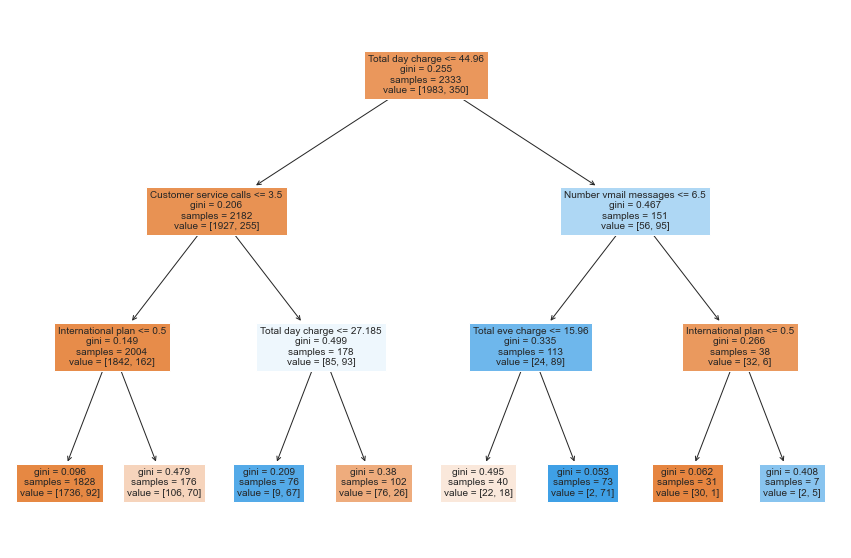

In [105]:
plt.figure(figsize=(15, 10))
tree.plot_tree(second_tree, fontsize=10, feature_names=list(X), filled=True)
plt.show( )